В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [25]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
cars_df = pd.read_csv("/content/drive/MyDrive/Machine_Learning/datasets/module_02/cars.csv")
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [4]:
for col in cars_df.columns:
    unique_types = cars_df[col].map(type).unique()
    print(f"{col}: {unique_types}")

Car_ID: [<class 'int'>]
Brand: [<class 'str'>]
Model: [<class 'str'>]
Year: [<class 'int'>]
Kilometers_Driven: [<class 'int'>]
Fuel_Type: [<class 'str'>]
Transmission: [<class 'str'>]
Owner_Type: [<class 'str'>]
Mileage: [<class 'int'>]
Engine: [<class 'int'>]
Power: [<class 'int'>]
Seats: [<class 'int'>]
Price: [<class 'int'>]


In [5]:
print("Unique values:")
categorical_columns = cars_df.select_dtypes(include='object').columns
for col in categorical_columns:
    unique_values = cars_df[col].nunique()
    print(f"{col}: {unique_values}")

Unique values:
Brand: 11
Model: 58
Fuel_Type: 2
Transmission: 2
Owner_Type: 3


В наборі даних 8 числових і 5 категоріальних колонок, з них
- 2 бінарні (мають лише 2 значення) - Fuel_Type, Transmission
- 2 мультикатегоріальні (більше 2х значень) зі значеннями, для яких немає відношення порядку - Brand, Model
- 1 колонка, в якій можна встановити відношення порядку (наприклад Small<Medium<Large) - Owner_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [6]:
X = cars_df.drop(columns=['Price'])
y = cars_df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
# X_train, X_test, y_train, y_test

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [7]:
fuel_counts = X_train['Fuel_Type'].value_counts()
fuel_type_codes = {cat: int(i == 0) for i, cat in enumerate(fuel_counts.index)}
X_train['Fuel_Type_Code'] = X_train.Fuel_Type.map(fuel_type_codes)
X_test['Fuel_Type_Code'] = X_test.Fuel_Type.map(fuel_type_codes)

transmission_counts = X_train['Transmission'].value_counts()
transmission_codes = {cat: int(i == 0) for i, cat in enumerate(transmission_counts.index)}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

# X_train['Fuel_Type_Code'], X_test['Fuel_Type_Code'], X_train['Transmission_Code'], X_test['Transmission_Code']


In [8]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
# enc.categories_
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot_train
X_test[enc.categories_[0]] = one_hot_test
# X_train, X_test

In [9]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [10]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

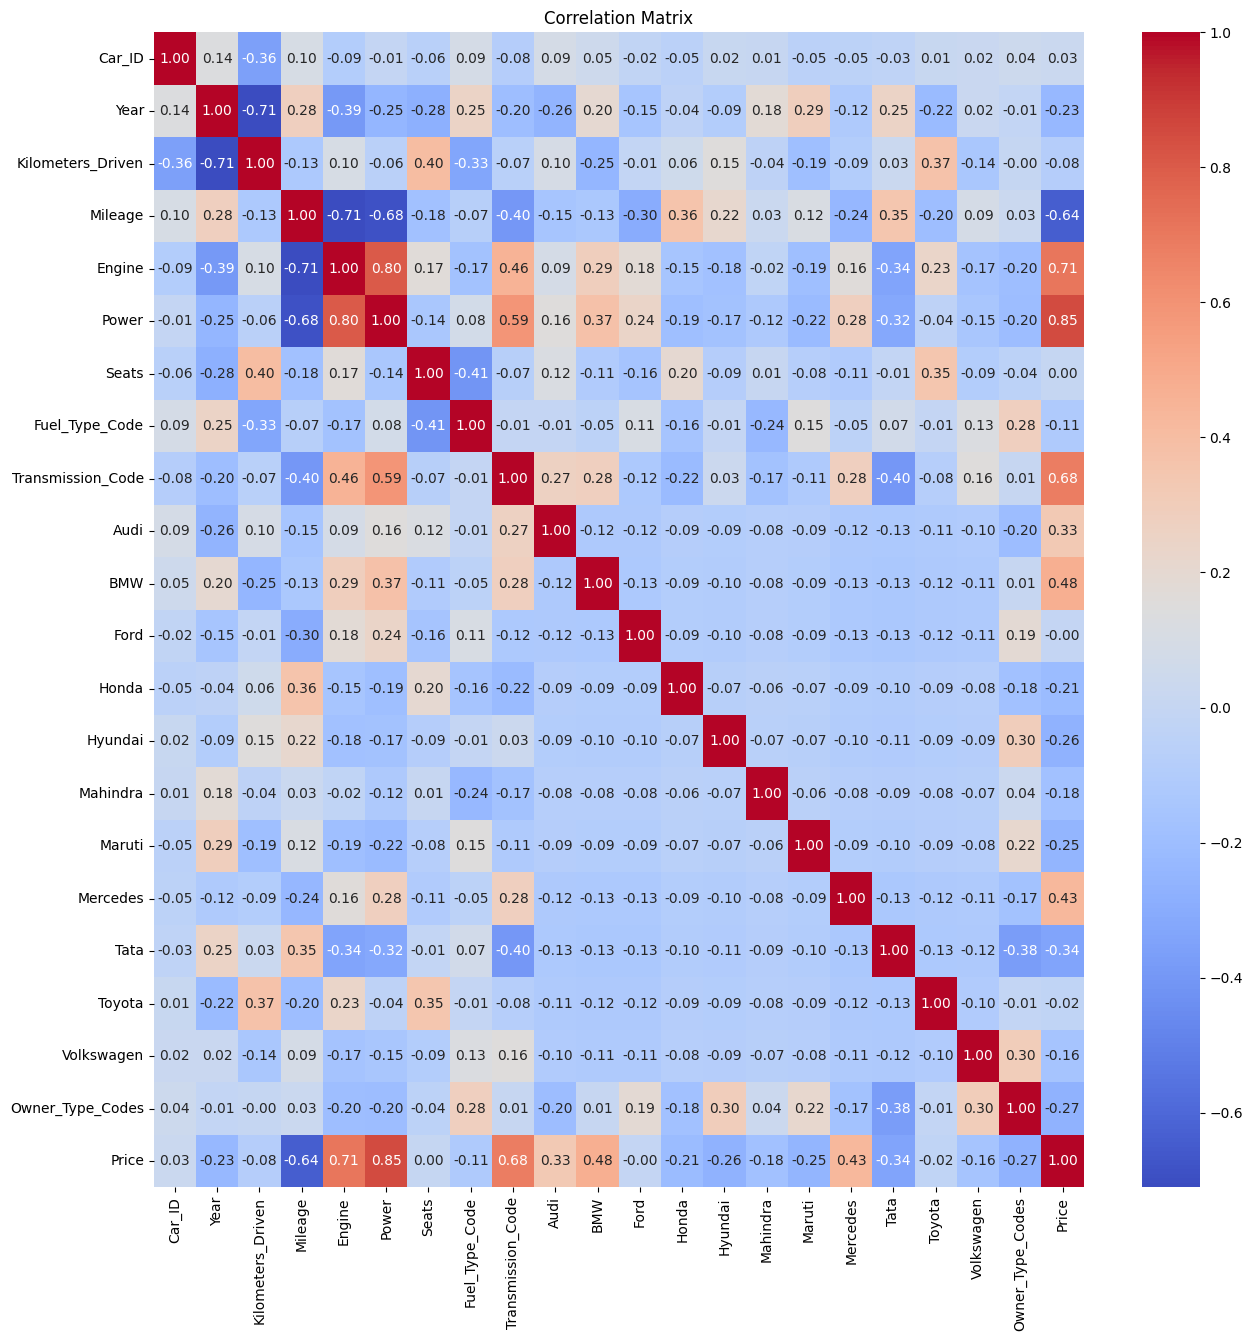

In [11]:
X_train = X_train.select_dtypes(exclude='object')
df_train = pd.concat([X_train, y_train], axis=1)
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Найвищу кореляцію з ціною (більше 0.5) мають: Mileage (-0.64), Engine(0.71), Power(0.85) i Transmission_Code (0.68).

Крім цього, деякі змінні корелюють між собою, наприклад: Mileage i Engine (-0.71), Mileage i Power (-0.68), Power i Transmission_Code (0.59)

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [20]:
X_test = X_test.select_dtypes(exclude='object')
model = LinearRegression().fit(X_train, y_train)
predictions_train = model.predict(X_train)
loss_train = root_mean_squared_error(y_train, predictions_train)
predictions_test = model.predict(X_test)
loss_test = root_mean_squared_error(y_test, predictions_test)

loss_train, loss_test

(210293.57828151877, 258181.56112032934)

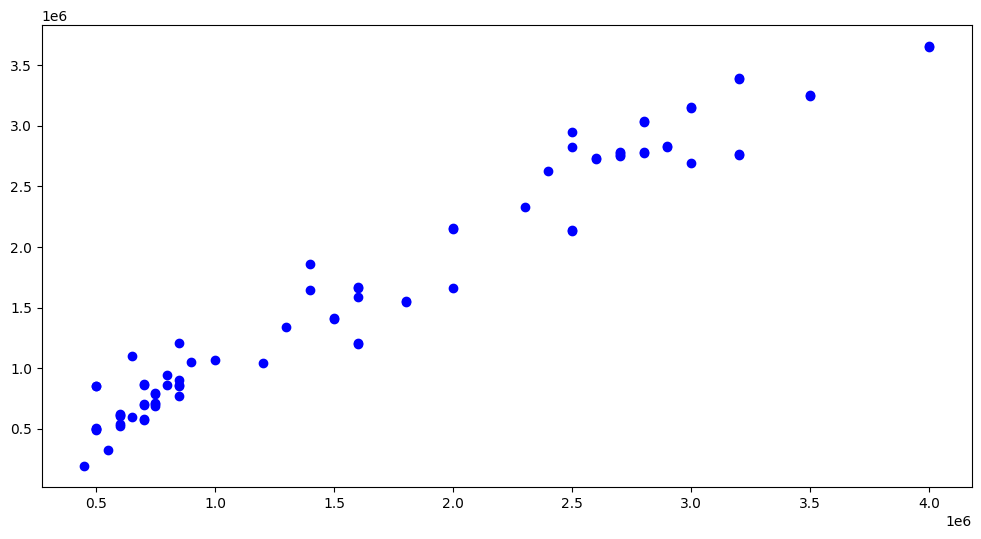

In [23]:
plt.figure(figsize=(12, 6))
plt.scatter(y_train, predictions_train, color='blue')

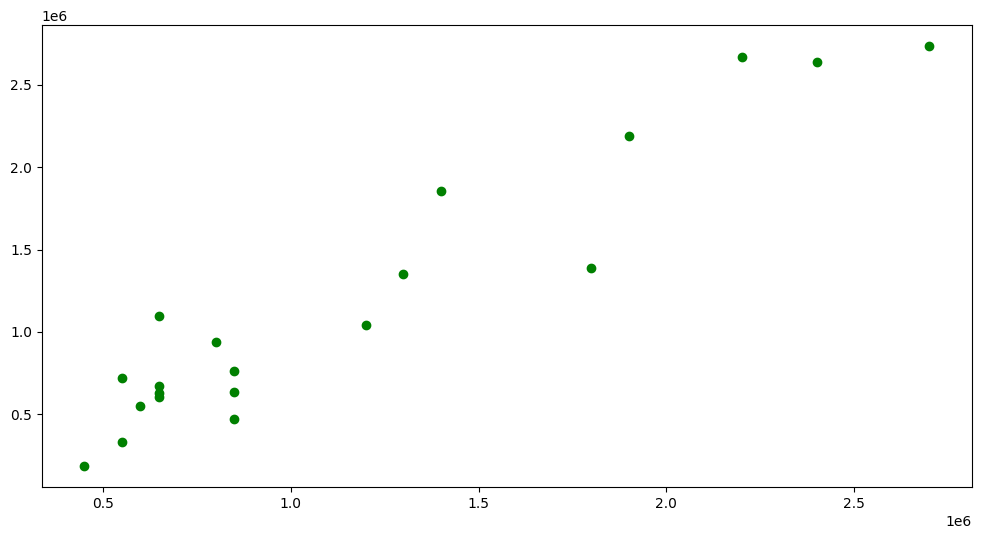

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions_test, color='green')

На тестовому датасеті модель показує гірші результати, але спостерігається кореляція між фактичними значеннями і передбаченнями

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_inputs_train = scaler.transform(X_train)
scaled_inputs_test = scaler.transform(X_test)

model_scaled = LinearRegression().fit(scaled_inputs_train, y_train)
predictions_train_scaled = model_scaled.predict(scaled_inputs_train)
loss_train_scaled = root_mean_squared_error(y_train, predictions_train_scaled)

predictions_test_scaled = model_scaled.predict(scaled_inputs_test)
loss_test_scaled = root_mean_squared_error(y_test, predictions_test_scaled)

loss_train_scaled, loss_test_scaled

(210293.57828151854, 258181.56112032832)

In [31]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.680000e+06
5,Power,4.967692e+05
16,Mercedes,2.100488e+05
10,BMW,2.084073e+05
9,Audi,2.056001e+05
8,Transmission_Code,1.166938e+05
20,Owner_Type_Codes,4.234495e+04
18,Toyota,1.580570e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


Найвпливовіша змінна - це потужність автомобіля. Також на ціну суттєво впливають окремі марки авто (Mercedes, BMW, Audi) і тип коробки передач (transmission). Збільшення усіх цих змінних впливає на збільшення вартості авто:  
- чим вища потужність, тим вища ціна - це обгрунтовано
- окремі марки авто можуть мати вищу ціну із-за бренду, тому наявність марок авто у значимих змінних теж логічне
- ручній коробці передач відповідає 0, а автоматичній 1, тому тут також логічно, що для авто з автоматичною коробкою передач ціна вища

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [38]:
Y = y_train
feature_names = scaler.get_feature_names_out()
X = pd.DataFrame(scaled_inputs_train, columns=feature_names)
X = X.reset_index(drop=True)
Y = y_train.reset_index(drop=True)
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        15:04:25   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

In [39]:
results.pvalues[results.pvalues < 0.05].index

Index(['const', 'Mileage', 'Power', 'Fuel_Type_Code', 'Transmission_Code',
       'Audi', 'BMW', 'Ford', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes',
       'Volkswagen'],
      dtype='object')

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [44]:
feature_names2 = results.pvalues[results.pvalues < 0.05].index
feature_names2 = feature_names2.drop('const', errors='ignore')
X2 = X[feature_names2]
X2 = X2.reset_index(drop=True)
Y2 = y_train.reset_index(drop=True)
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2,X2)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        15:13:05   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

R2 і Adj. R-squared майже не змінилися: 0.959->0.951 i 0.945->0.943, відповідно

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [45]:
feature_names3 = results.pvalues[results.pvalues < 0.25].index
feature_names3 = feature_names3.drop('const', errors='ignore')
X3 = X[feature_names3]
X3 = X3.reset_index(drop=True)
Y3 = y_train.reset_index(drop=True)
X3 = sm.add_constant(X3)
model3 = sm.OLS(Y3,X3)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        15:15:54   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

R2 і Adj. R-squared майже не змінилися: 0.959->0.958 i 0.945->0.948, відповідно. Adj. R-squared трішки збільшився, тому можна віддати перевагу останній моделі, але фактично всі 3 моделі показують схожі результати